### Generate SDE-based simulation data

(Working on SDEvelo)
2024-09-13 15:29:17


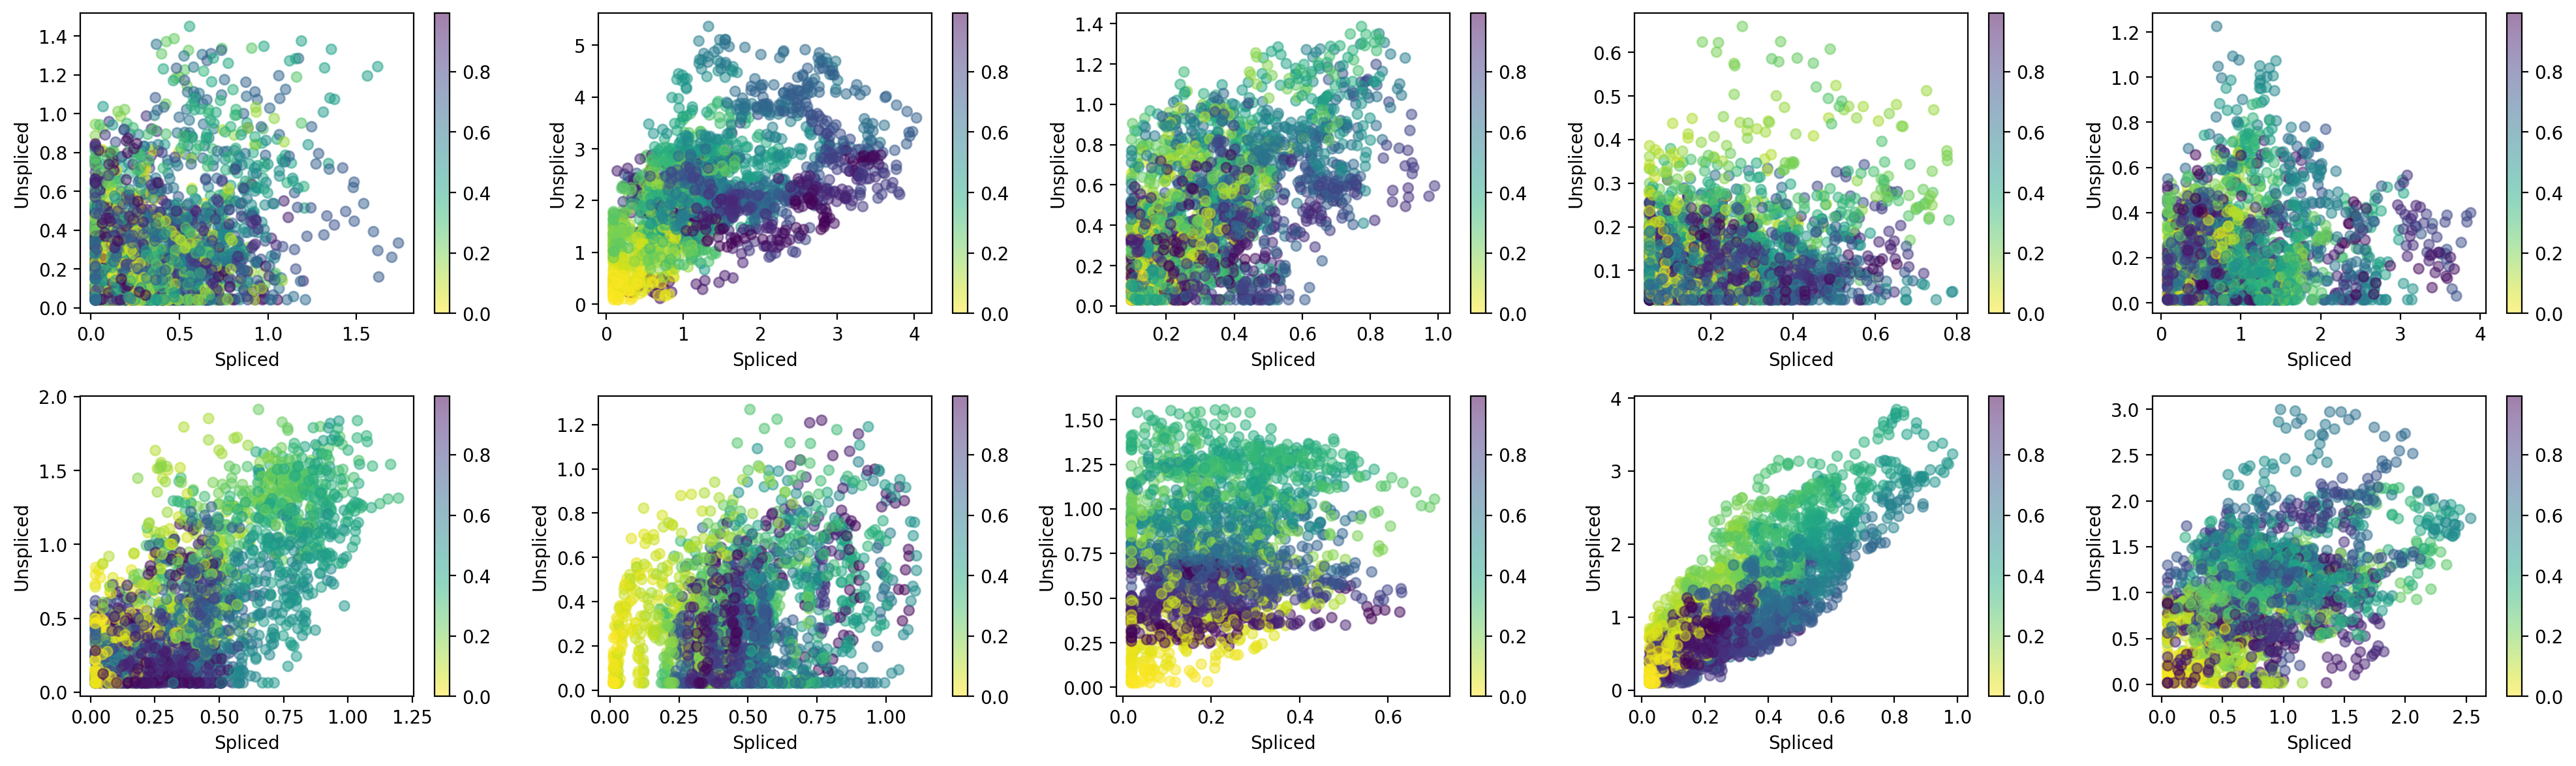

In [1]:
# import sdevelo as sv
import sv
simulation = sv.SimData(n_vars=100)
adata = simulation.generate()

# Simulation unspliced and spliced scatter plot
simulation.plot_scatter(n1=2, n2=5)

### Train SDEvelo model

In [2]:
args = sv.Config()
model = sv.SDENN(args, adata)
adata = model.train(100)

cuda
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Logarithmized X.
computing neighbors
    finished (0:00:08) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
2000
Epoch: 0, Loss: 0.762, alpha: 1.34, beta: 3.24, gamma: 1.07, s1: 0.011, s2: 0.010,  t_m: 0.513,  u_shift: -0.005,  s_shift: -0.002
Epoch: 50, Loss: 0.504, alpha: 2.35, beta: 4.50, gamma: 3.57, s1: 0.010, s2: 0.010,  t_m: 0.631,  u_shift: 0.007,  s_shift: 0.100


### Visualization

computing velocity graph (using 10/128 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'sde_velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'sde_velocity_length' (adata.obs)
--> added 'sde_velocity_confidence' (adata.obs)
--> added 'sde_velocity_confidence_transition' (adata.obs)
computing velocity embedding
    finished (0:00:00) --> added
    'sde_velocity_pca', embedded velocity vectors (adata.obsm)


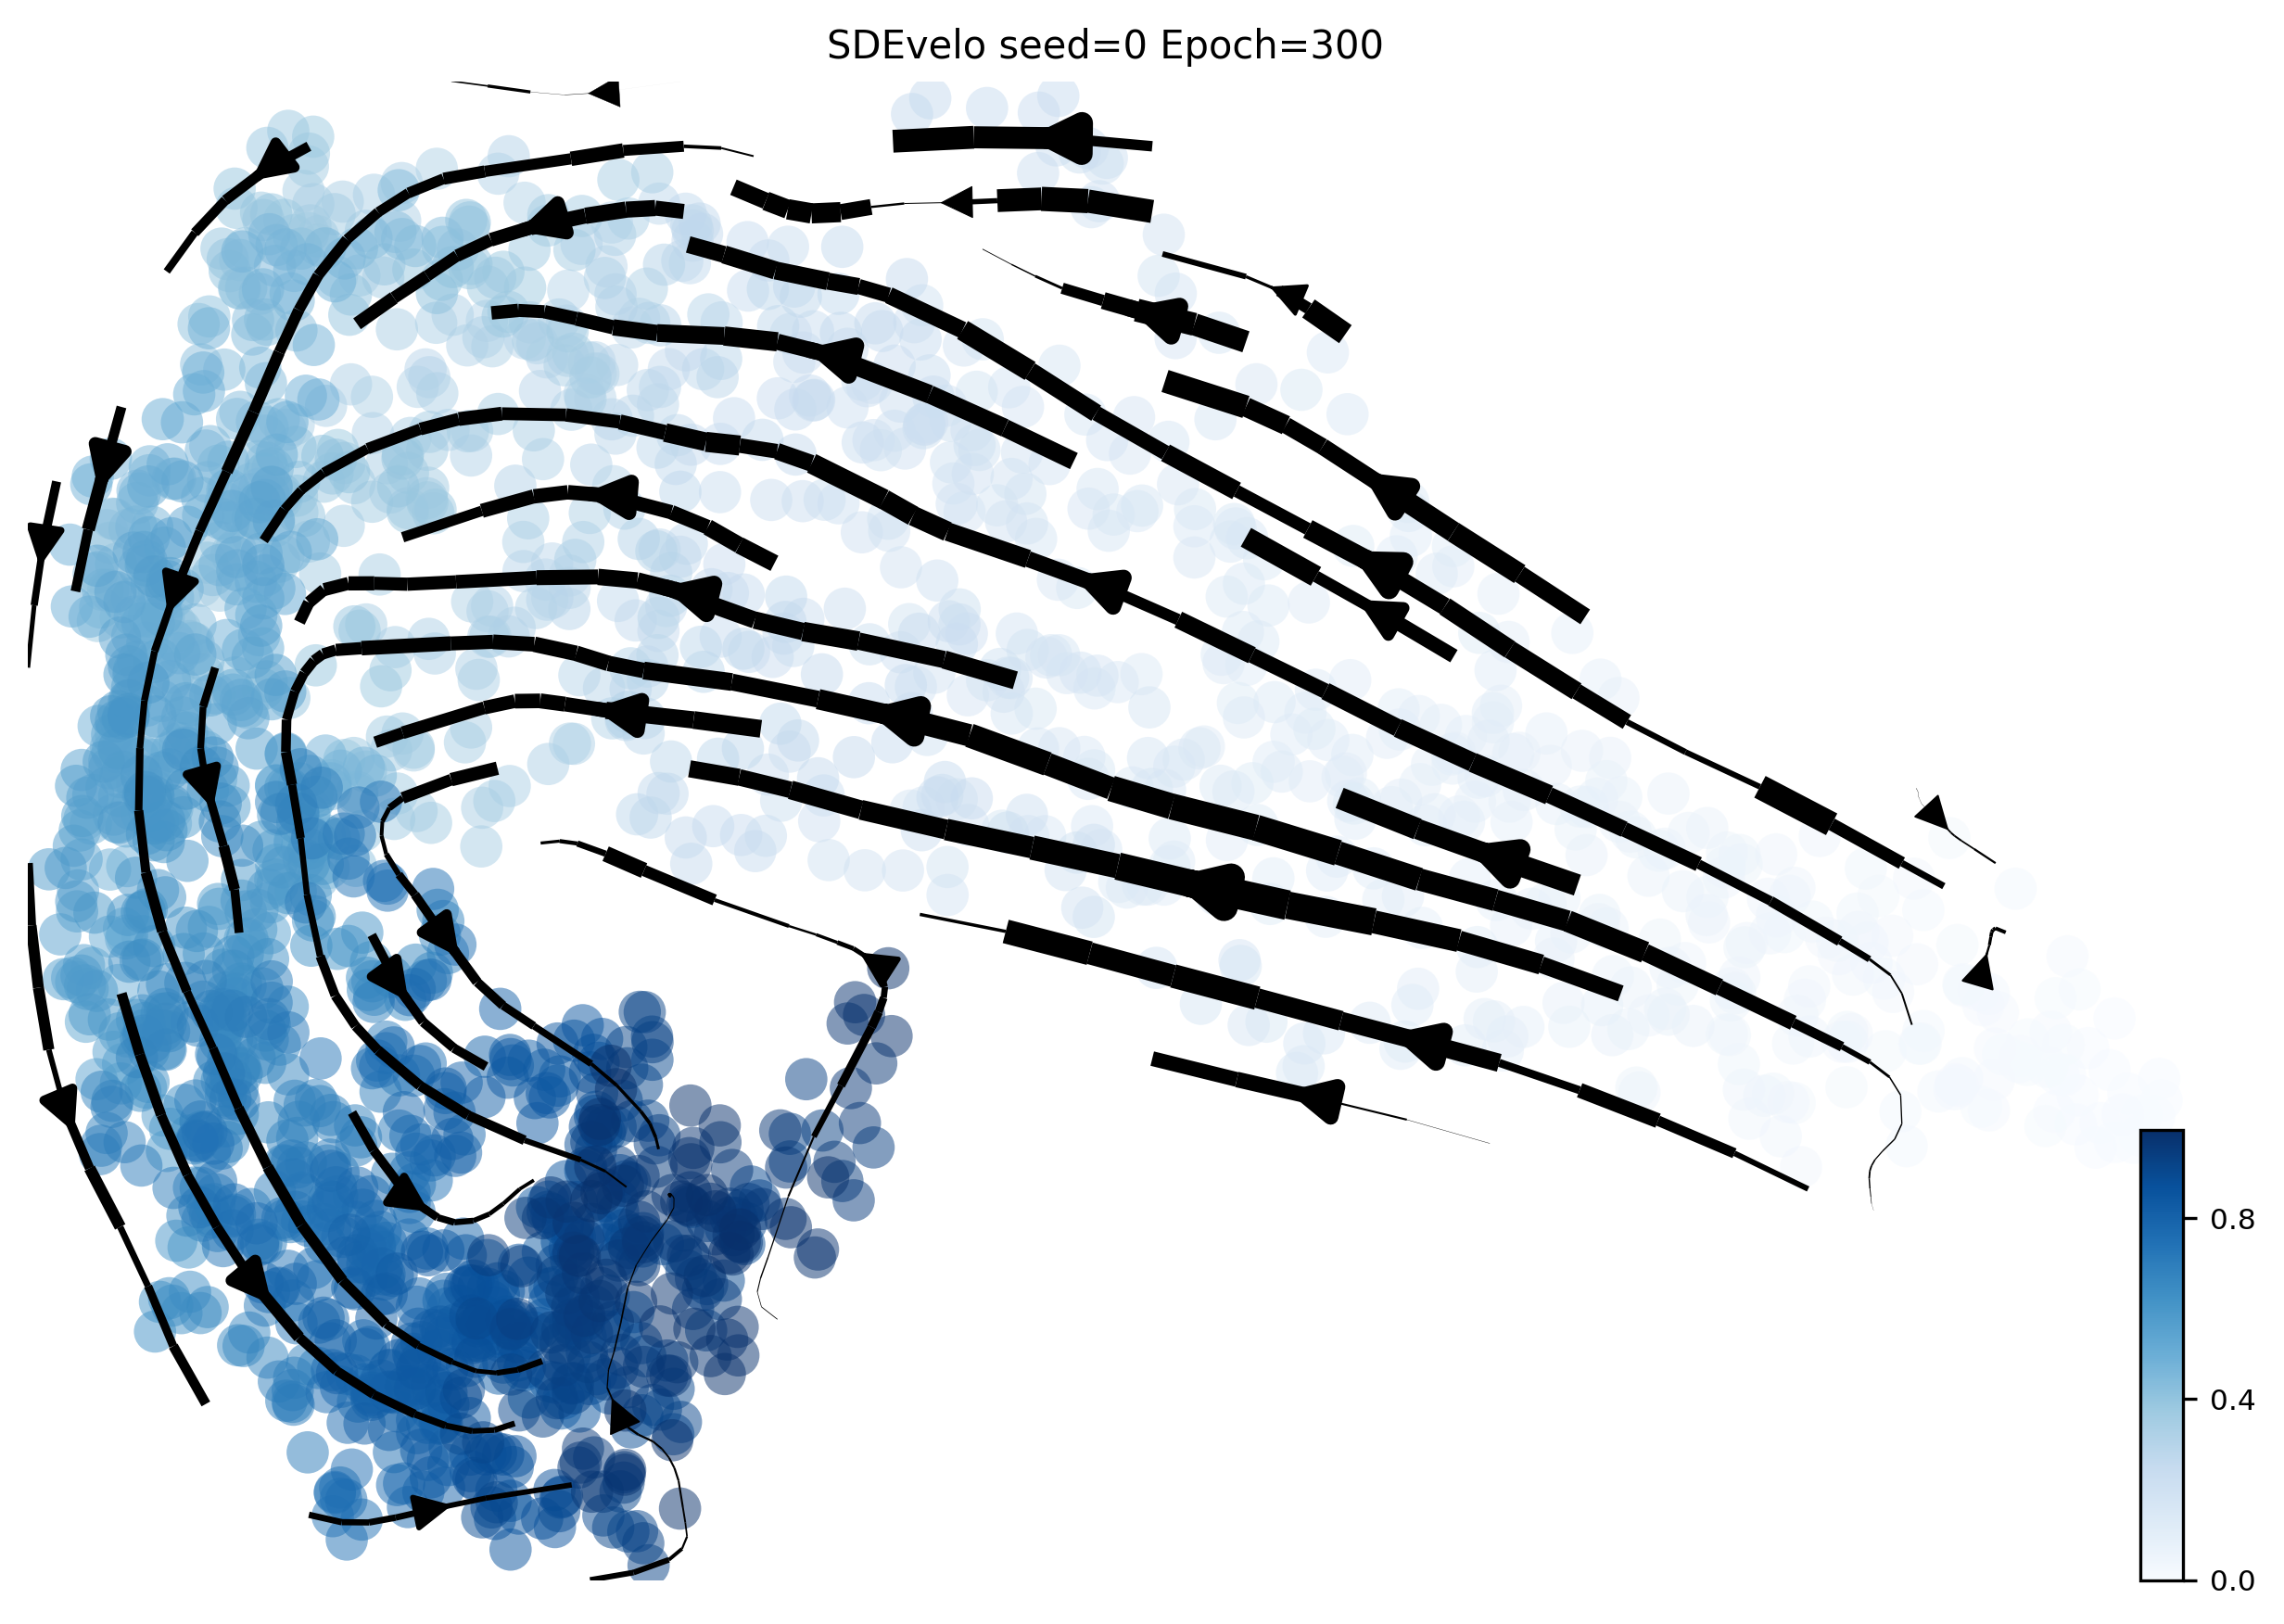

In [3]:
args.vis_type_col = 'true_t'
kwargs = dict(fontsize=10, density=0.8, arrow_size=2, linewidth=4, cmap='Blues', alpha=0.5)
sv.plot_streamline(adata, args, **kwargs)

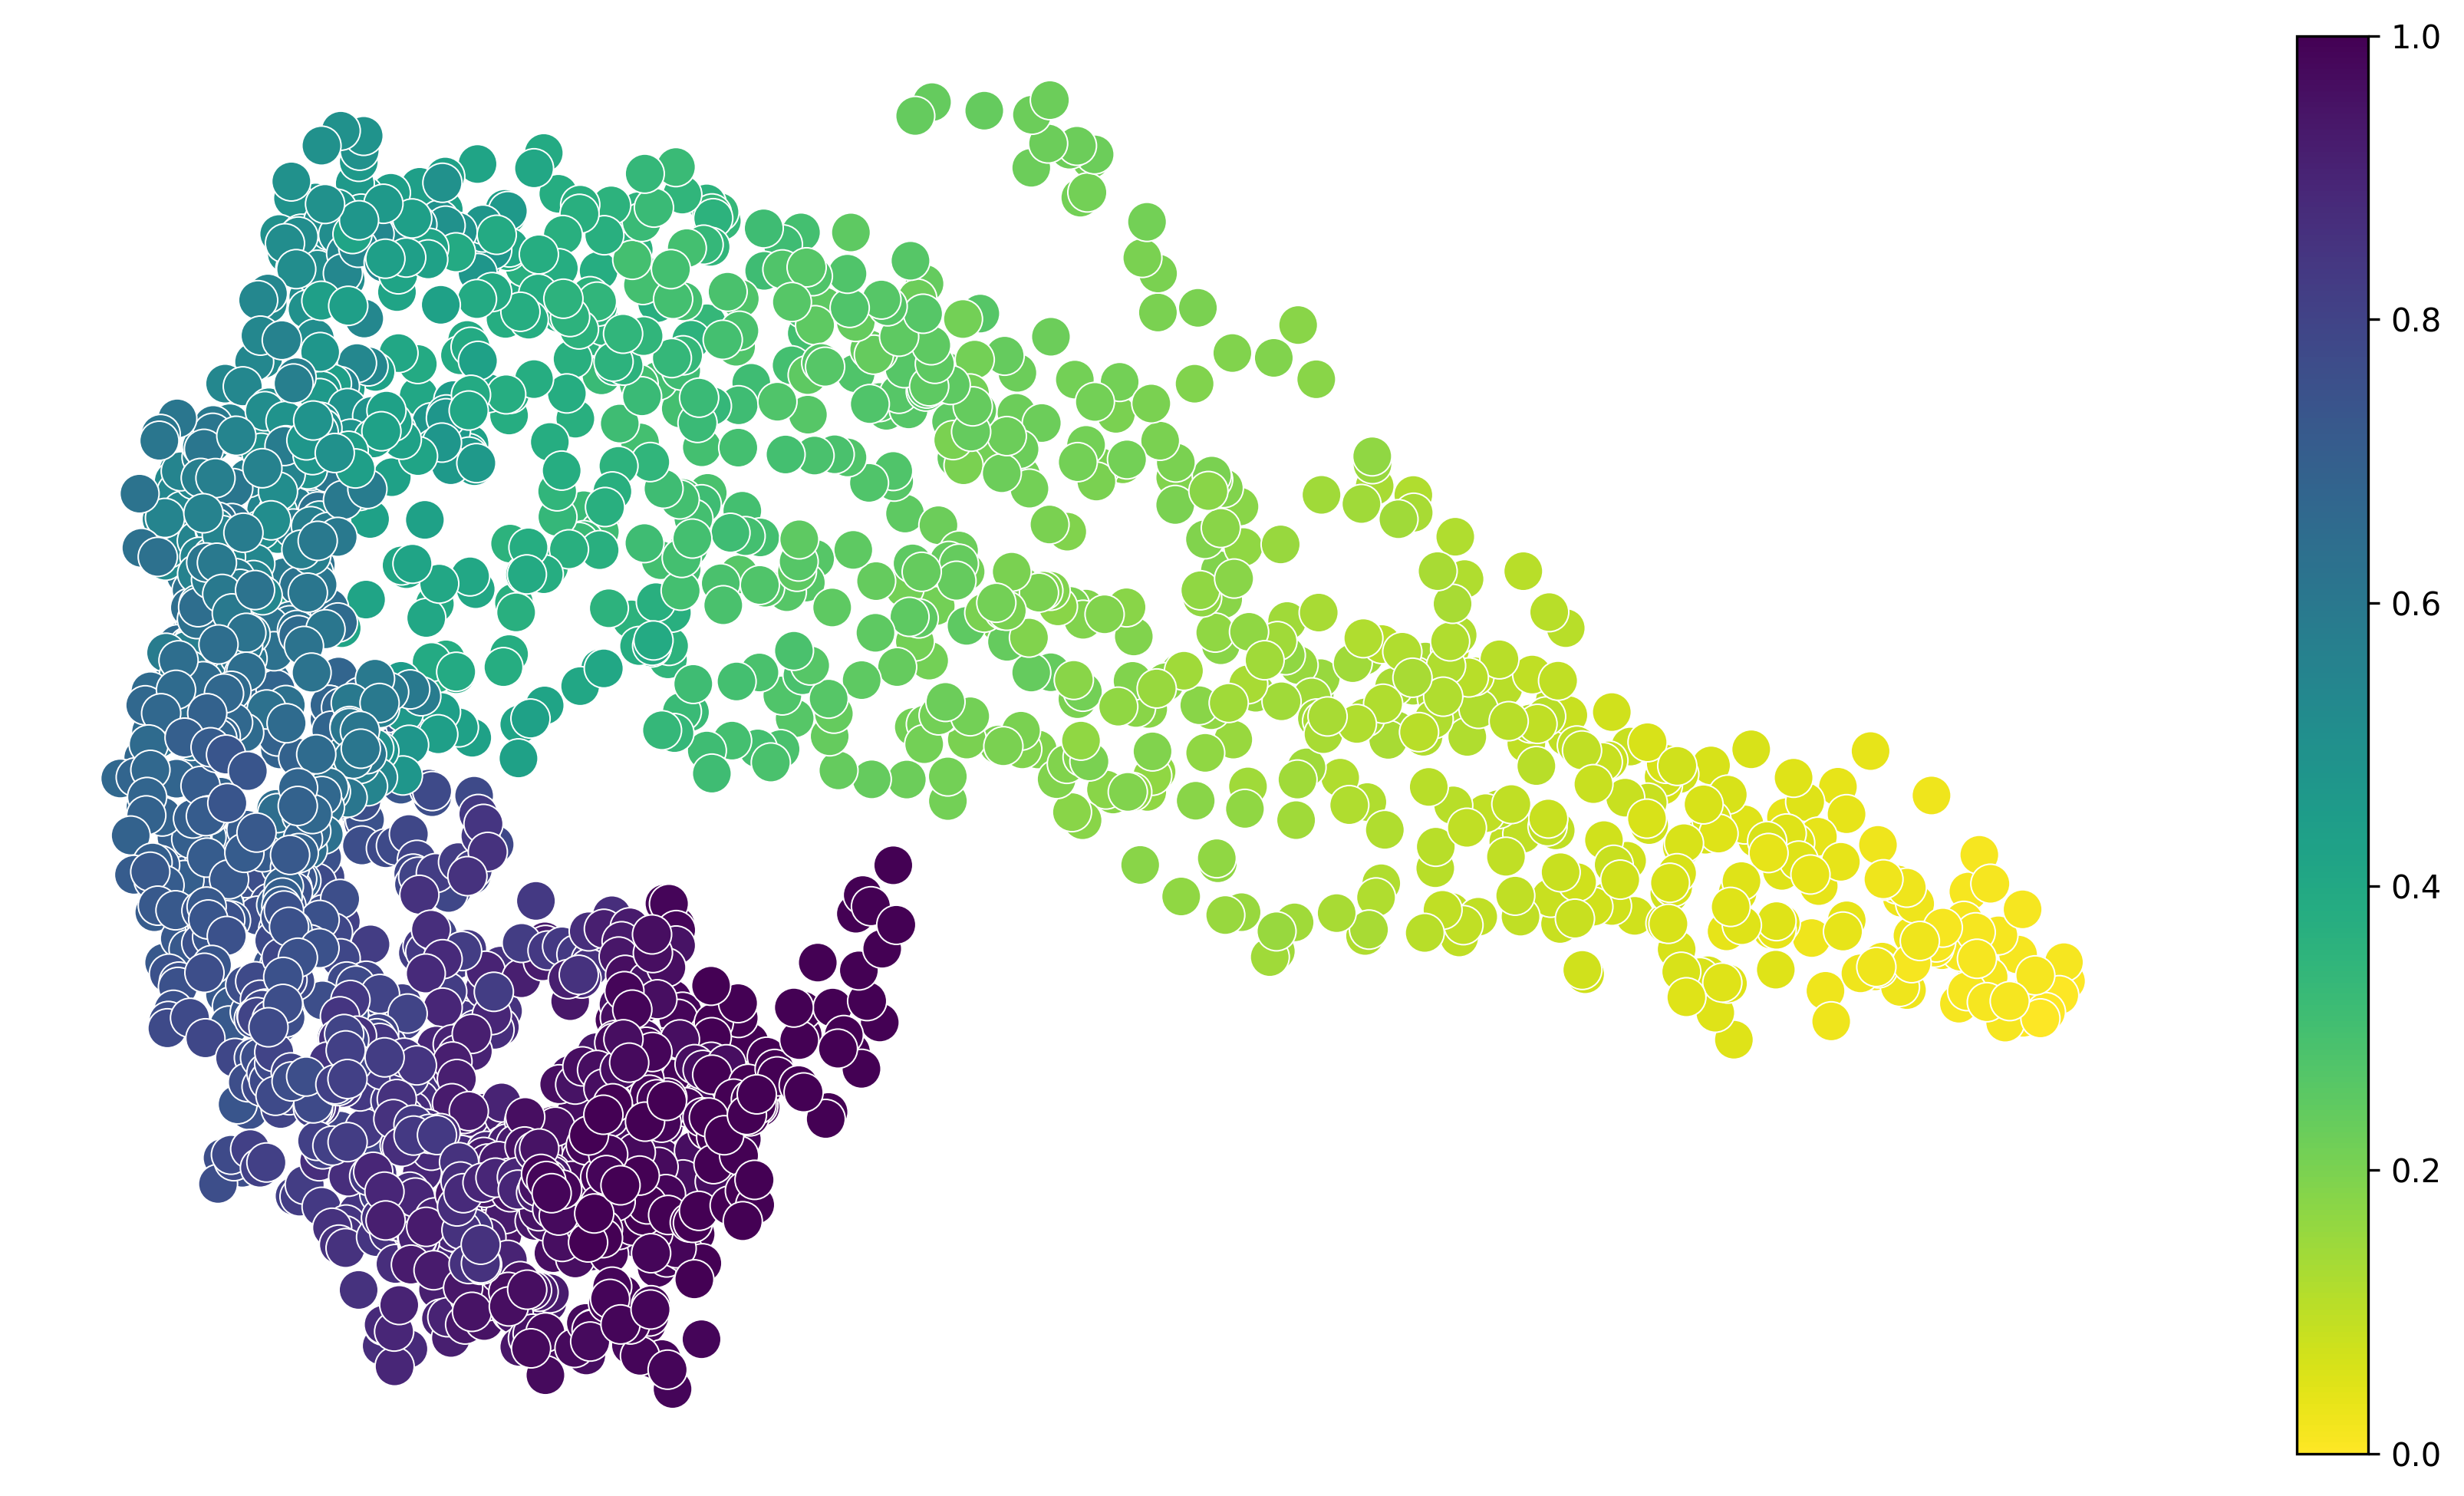

In [4]:
sv.plot_latent_time(adata, args)

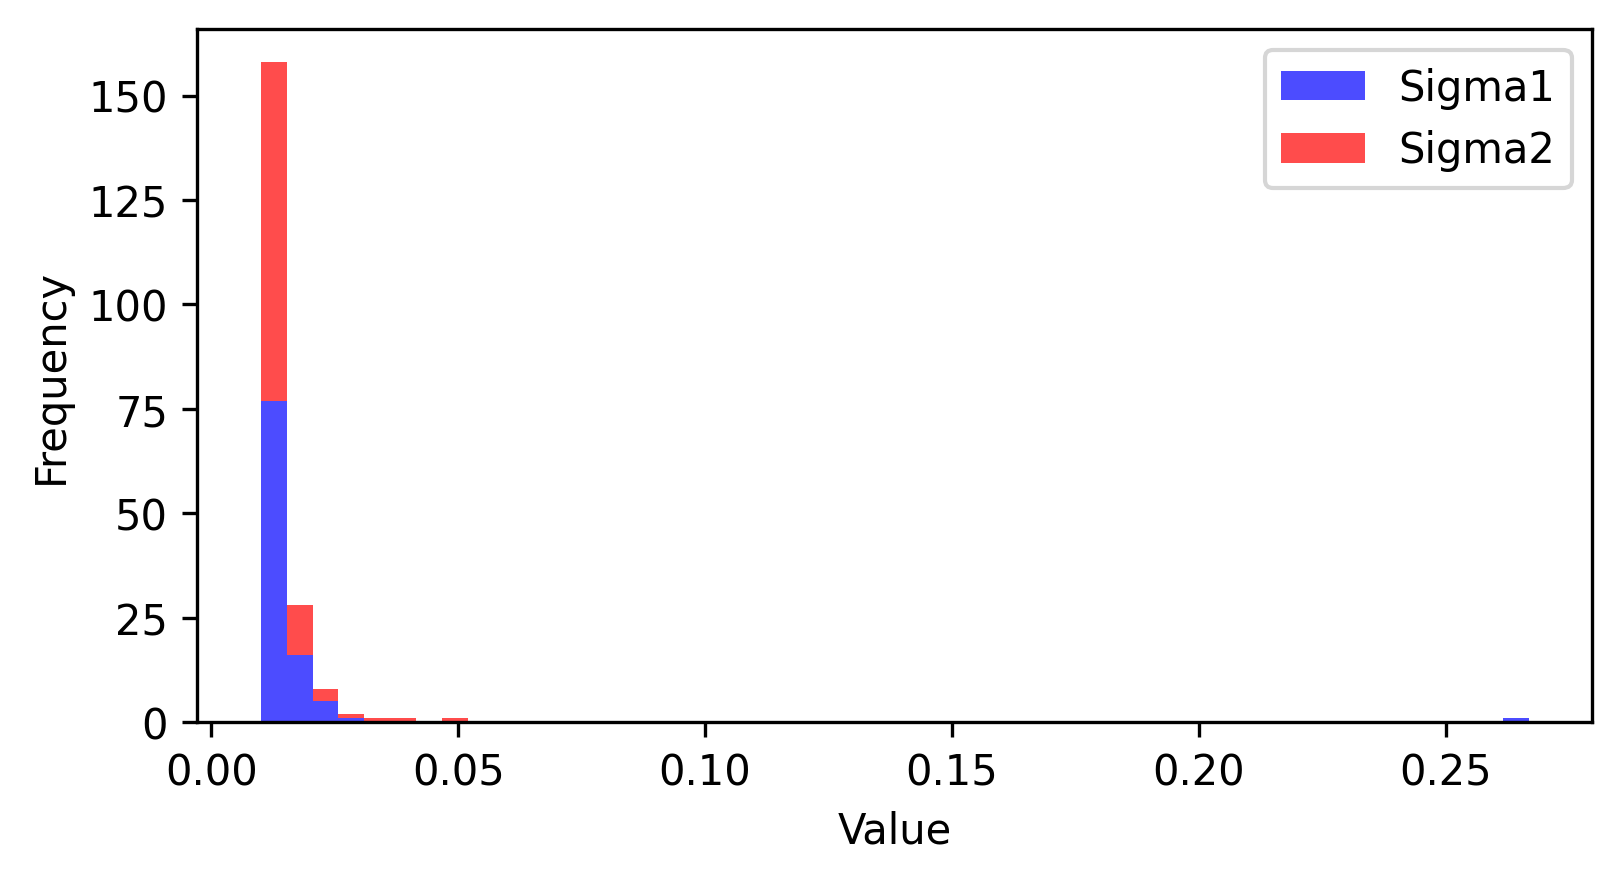

In [5]:
sv.plot_noise_histogram(adata)